In [1]:
import pyucalgarysrs
import datetime

In [2]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2021, 11, 4, 6, 30, 0)
end_dt = datetime.datetime(2021, 11, 4, 6, 35, 59)

In [3]:
res = srs.data.download("TREX_NIR_RAW", start_dt, end_dt, site_uid="gill")

In [4]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [5]:
data.data

array([[[375, 351, 323, ..., 358, 336, 336],
        [325, 327, 351, ..., 347, 347, 340],
        [337, 330, 320, ..., 333, 341, 329],
        ...,
        [330, 371, 349, ..., 340, 367, 336],
        [355, 327, 348, ..., 319, 338, 354],
        [370, 350, 385, ..., 372, 387, 366]],

       [[354, 368, 339, ..., 353, 321, 313],
        [356, 339, 351, ..., 332, 343, 353],
        [346, 335, 336, ..., 332, 339, 329],
        ...,
        [330, 329, 358, ..., 337, 338, 350],
        [344, 358, 345, ..., 355, 344, 316],
        [383, 378, 394, ..., 363, 362, 386]],

       [[337, 355, 356, ..., 332, 330, 337],
        [303, 335, 328, ..., 357, 312, 327],
        [355, 321, 335, ..., 326, 351, 347],
        ...,
        [340, 340, 341, ..., 356, 334, 327],
        [349, 332, 331, ..., 358, 342, 357],
        [359, 382, 366, ..., 346, 382, 356]],

       ...,

       [[363, 359, 339, ..., 340, 354, 345],
        [335, 337, 323, ..., 367, 346, 339],
        [360, 333, 350, ..., 336, 331, 325

In [6]:
import numpy as np

scale_min = 300.0  # MUST be a float
scale_max = 2000.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (data.data[:, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)  # convert data type to 16-bit

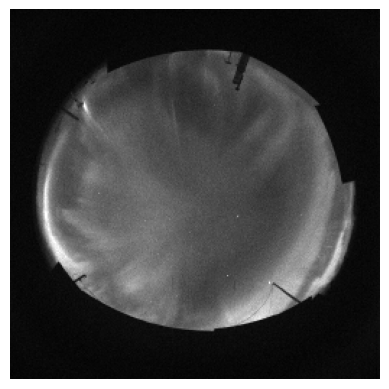

In [7]:
import matplotlib.pyplot as plt

plt.imshow(im_scaled[:, :, 0], origin="lower", cmap="gray")
plt.axis("off")
plt.show()

In [8]:
plt.style.use("dark_background")

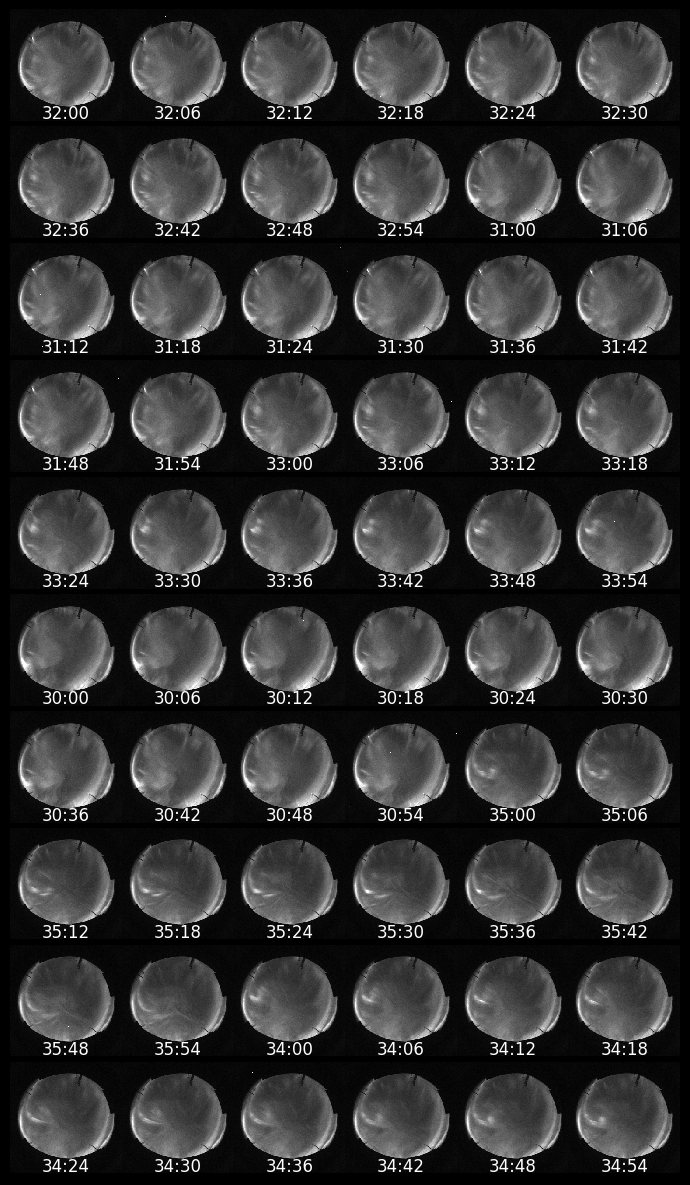

In [9]:
rows = 10
cols = 6
figsize = (7, 12)
timestamps_format = "%M:%S"
timestamps_fontsize = 12
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)